In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
df = pd.read_csv("FBC Result 2.0.csv")
df.head()

,Sample ID,WBC,Neu,Lym,Mon,Eos,Bas,RBC,HGB,HCT,PLT,Gender,Ref. group,Age,WBC Message,RBC Message,PLT Message,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,59.00,17.37,0.91,0.82,0.01,0.0,4.89,5.6,12.0,15,Male,Adult male,38,Leucocytosis\nNeutrophilia,RBC Distribution Abnormal\nMicrocytosis\nAnemia,NaN,NaN,NaN,NaN
1,2,24.47,21.06,1.32,2.04,0.05,0.0,3.81,12.5,34.5,264,Female,Adult female,39,Leucocytosis\nNeutrophilia\nMonocytosis,NaN,NaN,NaN,NaN,NaN
2,3,8.18,4.05,3.07,0.82,0.24,0.0,4.04,12.1,34.9,396,Female,Adult female,42,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8.23,4.95,2.36,0.71,0.21,0.0,4.81,14.4,41.0,234,Male,Adult male,26,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9.99,6.44,2.02,1.13,0.40,0.0,3.29,9.6,28.2,232,Female,Adult female,45,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.shape)

(3757, 20)


In [ ]:
df.dtypes

Sample ID        int64
WBC            float64
Neu            float64
Lym            float64
Mon            float64
Eos            float64
Bas            float64
RBC            float64
HGB            float64
HCT            float64
PLT              int64
Gender          object
Ref. group      object
Age             object
WBC Message     object
RBC Message     object
PLT Message     object
Unnamed: 17    float64
Unnamed: 18    float64
Unnamed: 19    float64
dtype: object

In [ ]:
ms_df = df
ms_df.head()

,Sample ID,WBC,Neu,Lym,Mon,Eos,Bas,RBC,HGB,HCT,PLT,Gender,Ref. group,Age,WBC Message,RBC Message,PLT Message,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,59.00,17.37,0.91,0.82,0.01,0.0,4.89,5.6,12.0,15,Male,Adult male,38,Leucocytosis\nNeutrophilia,RBC Distribution Abnormal\nMicrocytosis\nAnemia,NaN,NaN,NaN,NaN
1,2,24.47,21.06,1.32,2.04,0.05,0.0,3.81,12.5,34.5,264,Female,Adult female,39,Leucocytosis\nNeutrophilia\nMonocytosis,NaN,NaN,NaN,NaN,NaN
2,3,8.18,4.05,3.07,0.82,0.24,0.0,4.04,12.1,34.9,396,Female,Adult female,42,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8.23,4.95,2.36,0.71,0.21,0.0,4.81,14.4,41.0,234,Male,Adult male,26,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9.99,6.44,2.02,1.13,0.40,0.0,3.29,9.6,28.2,232,Female,Adult female,45,NaN,NaN,NaN,NaN,NaN,NaN


## Applying fuzzy logic

In [ ]:
WBC = ctrl.Antecedent(np.arange(0, 70, 0.01), 'WBC')
HGB = ctrl.Antecedent(np.arange(0, 40, 0.01), 'HGB')
HCT = ctrl.Antecedent(np.arange(0, 100, 0.01), 'HCT')
PLT = ctrl.Antecedent(np.arange(0, 1500, 0.01), 'PLT')

Diseases = ctrl.Consequent(np.arange(0, 101, 0.01), 'Diseases')


WBC['Low'] = fuzz.trimf(WBC.universe, [0, 4, 4])
WBC['Normal'] = fuzz.trimf(WBC.universe, [4, 10, 10])
WBC['High'] = fuzz.trimf(WBC.universe, [10, 60, 60])

HGB['Low'] = fuzz.trimf(HGB.universe, [0, 12, 12])
HGB['Normal'] = fuzz.trimf(HGB.universe, [12, 16, 16])
HGB['High'] = fuzz.trimf(HGB.universe, [16, 50, 50])

HCT['Low'] = fuzz.trimf(HCT.universe, [0, 35, 35])
HCT['Normal'] = fuzz.trimf(HCT.universe, [35, 54, 54])
HCT['High'] = fuzz.trimf(HCT.universe, [54, 100, 100])

PLT['Low'] = fuzz.trimf(PLT.universe, [0, 100, 100])
PLT['Normal'] = fuzz.trimf(PLT.universe, [100, 450, 450])
PLT['High'] = fuzz.trimf(PLT.universe, [450, 1500, 1500])



Diseases['Septicaemia / Urine Tract Infections - UTI'] = fuzz.trimf(Diseases.universe, [0, 4, 8])
Diseases['Septicaemia'] = fuzz.trimf(Diseases.universe, [8, 12, 16])
Diseases['Dengue'] = fuzz.trimf(Diseases.universe, [16, 20, 24])
Diseases['Other Viral Fevers'] = fuzz.trimf(Diseases.universe, [24, 28, 32])
Diseases['Other Viral Fevers / Idiopathic Thrombocytopenic Purpura - ITP'] = fuzz.trimf(Diseases.universe, [32, 36, 40])
Diseases['Iron Deficiency Anaemia - IDA / Sickle Cell Anaemia / Acute Blood Loss'] = fuzz.trimf(Diseases.universe, [40, 44, 48])
Diseases['Polycythemia'] = fuzz.trimf(Diseases.universe, [48, 52, 56])
Diseases['Pancytopenia'] = fuzz.trimf(Diseases.universe, [56, 60, 64])
Diseases['Chronic Kidney Disease - CKD'] = fuzz.trimf(Diseases.universe, [64, 68, 72])
Diseases['Chronic Liver Cell Disease - CLCD / Acute Blood Loss'] = fuzz.trimf(Diseases.universe, [72, 76, 80])
Diseases['No disease detected'] = fuzz.trimf(Diseases.universe, [80, 85, 90])
Diseases['Healthy'] = fuzz.trimf(Diseases.universe, [90, 95, 100])

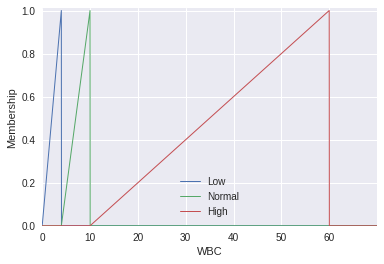

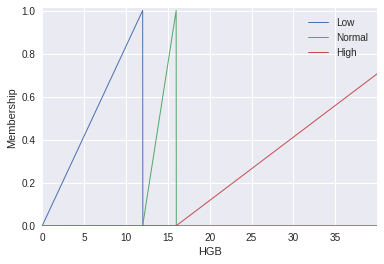

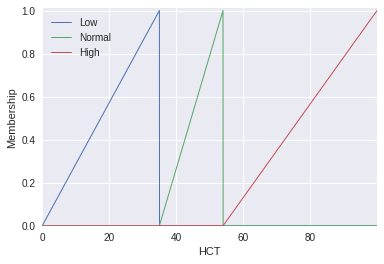

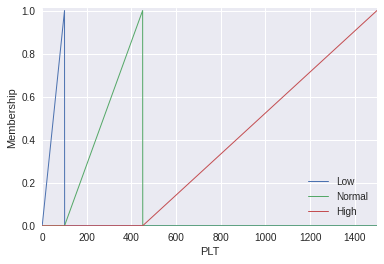

In [ ]:
WBC.view()
HGB.view()
HCT.view()
PLT.view()

In [ ]:
# Rules for Diseases

R1 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['Normal'] & PLT['Normal'], Diseases['Septicaemia / Urine Tract Infections - UTI'])
R2 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['Normal'] & PLT['High'], Diseases['Septicaemia'])
R3 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['High'] & PLT['Low'], Diseases['Dengue'])
R4 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['High'] & PLT['Low'], Diseases['Dengue'])
R5 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['Normal'] & PLT['Low'], Diseases['Other Viral Fevers'])
R6 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['Normal'] & PLT['Low'], Diseases['Other Viral Fevers / Idiopathic Thrombocytopenic Purpura - ITP'])
R7 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['Low'] & PLT['Normal'], Diseases['Iron Deficiency Anaemia - IDA / Sickle Cell Anaemia / Acute Blood Loss'])
R8 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['High'] & PLT['Normal'], Diseases['Polycythemia'])
R9 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['Low'] & PLT['Low'], Diseases['Pancytopenia'])
R10 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['Low'] & PLT['Low'], Diseases['Chronic Kidney Disease - CKD'])
R11 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['Low'] & PLT['Low'], Diseases['Chronic Liver Cell Disease - CLCD / Acute Blood Loss'])
R12 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['Normal'] & PLT['Normal'], Diseases['Healthy'])

In [ ]:
#Rules for no detection 
R13 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['Low'] & PLT['Normal'], Diseases['No disease detected'])
R14 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R15 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['Normal'] & PLT['Low'], Diseases['No disease detected'])
R16 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['Normal'] & PLT['Normal'], Diseases['No disease detected'])
R17 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['Normal'] & PLT['High'], Diseases['No disease detected'])
R18 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['High'] & PLT['Low'], Diseases['No disease detected'])
R19 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['High'] & PLT['Normal'], Diseases['No disease detected'])
R20 = ctrl.Rule(WBC['Low'] & HGB['Low'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])
R21 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['Low'] & PLT['Low'], Diseases['No disease detected'])
R22 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['Low'] & PLT['Normal'], Diseases['No disease detected'])
R23 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R24 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['Normal'] & PLT['Normal'], Diseases['No disease detected'])
R25 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['Normal'] & PLT['High'], Diseases['No disease detected'])
R26 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['High'] & PLT['Low'], Diseases['No disease detected'])
R27 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['High'] & PLT['Normal'], Diseases['No disease detected'])
R28 = ctrl.Rule(WBC['Low'] & HGB['Normal'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])
R29 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['Low'] & PLT['Low'], Diseases['No disease detected'])
R30 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['Low'] & PLT['Normal'], Diseases['No disease detected'])
R31 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R32 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['Normal'] & PLT['Low'], Diseases['No disease detected'])
R33 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['Normal'] & PLT['Normal'], Diseases['No disease detected'])
R34 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['Normal'] & PLT['High'], Diseases['No disease detected'])
R35 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['High'] & PLT['Normal'], Diseases['No disease detected'])
R36 = ctrl.Rule(WBC['Low'] & HGB['High'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])
R37 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R38 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['Normal'] & PLT['Low'], Diseases['No disease detected'])
R39 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['Normal'] & PLT['Normal'], Diseases['No disease detected'])
R40 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['Normal'] & PLT['High'], Diseases['No disease detected'])
R41 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['High'] & PLT['Low'], Diseases['No disease detected'])
R42 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['High'] & PLT['Normal'], Diseases['No disease detected'])
R43 = ctrl.Rule(WBC['Normal'] & HGB['Low'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])
R44 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['Low'] & PLT['Low'], Diseases['No disease detected'])
R45 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['Low'] & PLT['Normal'], Diseases['No disease detected'])
R46 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R47 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['Normal'] & PLT['High'], Diseases['No disease detected'])
R48 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['High'] & PLT['Low'], Diseases['No disease detected'])
R49 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['High'] & PLT['Normal'], Diseases['No disease detected'])
R50 = ctrl.Rule(WBC['Normal'] & HGB['Normal'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])
R51 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['Low'] & PLT['Low'], Diseases['No disease detected'])
R52 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['Low'] & PLT['Normal'], Diseases['No disease detected'])
R53 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R54 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['Normal'] & PLT['Low'], Diseases['No disease detected'])
R55 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['Normal'] & PLT['Normal'], Diseases['No disease detected'])
R56 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['Normal'] & PLT['High'], Diseases['No disease detected'])
R57 = ctrl.Rule(WBC['Normal'] & HGB['High'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])
R58 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['Low'] & PLT['Normal'], Diseases['No disease detected'])
R59 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R60 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['Normal'] & PLT['Low'], Diseases['No disease detected'])
R61 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['Normal'] & PLT['Normal'], Diseases['No disease detected'])
R62 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['Normal'] & PLT['High'], Diseases['No disease detected'])
R63 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['High'] & PLT['Low'], Diseases['No disease detected'])
R64 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['High'] & PLT['Normal'], Diseases['No disease detected'])
R65 = ctrl.Rule(WBC['High'] & HGB['Low'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])
R66 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['Low'] & PLT['Low'], Diseases['No disease detected'])
R67 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['Low'] & PLT['Normal'], Diseases['No disease detected'])
R68 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R69 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['Normal'] & PLT['Low'], Diseases['No disease detected'])
R70 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['High'] & PLT['Low'], Diseases['No disease detected'])
R71 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['High'] & PLT['Normal'], Diseases['No disease detected'])
R72 = ctrl.Rule(WBC['High'] & HGB['Normal'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])
R73 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['Low'] & PLT['Low'], Diseases['No disease detected'])
R74 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['Low'] & PLT['Normal'], Diseases['No disease detected'])
R75 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['Low'] & PLT['High'], Diseases['No disease detected'])
R76 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['Normal'] & PLT['Low'], Diseases['No disease detected']) 
R77 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['Normal'] & PLT['Normal'], Diseases['No disease detected'])
R78 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['Normal'] & PLT['High'], Diseases['No disease detected'])
R79 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['High'] & PLT['Low'], Diseases['No disease detected'])
R80 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['High'] & PLT['Normal'], Diseases['No disease detected'])
R81 = ctrl.Rule(WBC['High'] & HGB['High'] & HCT['High'] & PLT['High'], Diseases['No disease detected'])




In [ ]:
#Rules process

Diseases_ctrl = ctrl.ControlSystem([R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25,R26,R27,R28,R29,R30,R31,R32,R33,R34,R35,R36,R37,R38,R39,R40,R41,R42,R43,R44,R45,R46,R47,R48,R49,R50,R51,R52,R53,R54,R55,R56,R57,R58,R59,R60,R61,R62,R63,R64,R65,R66,R67,R68,R69,R70,R71,R72,R73,R74,R75,R76,R77,R78,R79,R80,R81])
Diseases_check = ctrl.ControlSystemSimulation(Diseases_ctrl)

In [ ]:
#Removing the unknown values

ms_df = ms_df[ms_df.WBC != '*****']
ms_df = ms_df[ms_df.HGB != '*****']
ms_df = ms_df[ms_df.HCT != '*****']
ms_df = ms_df[ms_df.PLT != '*****']

In [ ]:
#Set all the features to float

ms_df['WBC'] = ms_df['WBC'].astype(float)
ms_df['HGB'] = ms_df['HGB'].astype(float)
ms_df['HCT'] = ms_df['HCT'].astype(float)
ms_df['PLT'] = ms_df['PLT'].astype(float)

In [ ]:
len(ms_df)

3757

85.00000000000087


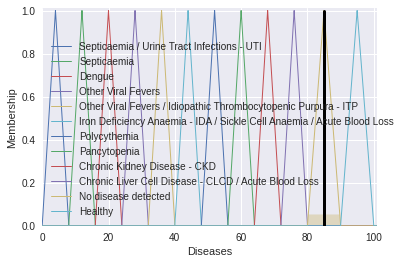

In [ ]:
#Checking a random line1 result

Diseases_check.input['WBC'] = ms_df['WBC'][590]
Diseases_check.input['HGB'] = ms_df['HGB'][590]
Diseases_check.input['HCT'] = ms_df['HCT'][590]
Diseases_check.input['PLT'] = ms_df['PLT'][590]

Diseases_check.compute()
print(Diseases_check.output['Diseases'])
Diseases.view(sim=Diseases_check)

68.00000000000065


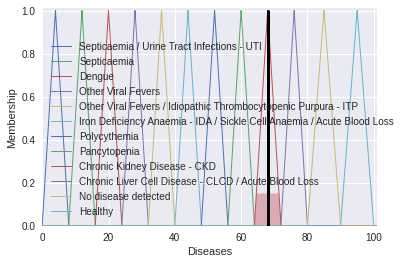

In [ ]:
#Checking a random line2 result

Diseases_check.input['WBC'] = ms_df['WBC'][0]
Diseases_check.input['HGB'] = ms_df['HGB'][0]
Diseases_check.input['HCT'] = ms_df['HCT'][0]
Diseases_check.input['PLT'] = ms_df['PLT'][0]

Diseases_check.compute()
print(Diseases_check.output['Diseases'])
Diseases.view(sim=Diseases_check)

In [ ]:
ms_df.iloc[248]

Sample ID             249
WBC                  3.41
Neu                   1.3
Lym                  1.71
Mon                  0.27
Eos                  0.13
Bas                   0.0
RBC                  4.06
HGB                  13.6
HCT                  38.2
PLT                 192.0
Gender               Male
Ref. group     Adult male
Age                    61
WBC Message           NaN
RBC Message           NaN
PLT Message           NaN
Unnamed: 17           NaN
Unnamed: 18           NaN
Unnamed: 19           NaN
Name: 248, dtype: object

### Labeling the results

In [ ]:

label = []

for i in range(len(ms_df)):
    Diseases_check.input['WBC'] = ms_df['WBC'][i]
    Diseases_check.input['HGB'] = ms_df['HGB'][i]
    Diseases_check.input['HCT'] = ms_df['HCT'][i]
    Diseases_check.input['PLT'] = ms_df['PLT'][i]
    
    Diseases_check.compute()
    
    print(i,Diseases_check.output['Diseases'])
    label.append(Diseases_check.output['Diseases'])



0 68.00000000000065
1 84.99999999999989
2 84.9999999999983
3 95.00000000000034
4 43.99999999999981
5 43.99999999999983
6 84.99999999999856
7 43.99999999999986
8 94.9999999999996
9 95.00000000000107
10 85.0000000000001
11 43.99999999999987
12 85.00000000000067
13 94.99999999999807
14 4.00000000000003
15 94.99999999999952
16 84.99999999999888
17 44.00000000000011
18 94.99999999999957
19 85.00000000000007
20 43.99999999999958
21 44.000000000000256
22 44.00000000000014
23 85.00000000000018
24 44.00000000000013
25 3.9999999999999787
26 75.99999999999915
27 4.000000000000043
28 94.99999999999967
29 95.00000000000088
30 44.00000000000032
31 85.0
32 95.00000000000078
33 85.00000000000125
34 95.00000000000091
35 44.00000000000008
36 95.0000000000004
37 95.00000000000098
38 95.00000000000048
39 43.999999999999666
40 95.00000000000101
41 85.0000000000019
42 75.99999999999956
43 4.00000000000002
44 44.00000000000007
45 43.99999999999983
46 95.00000000000112
47 95.00000000000057
48 43.9999999999999

In [ ]:
label

[68.00000000000065,
 84.99999999999989,
 84.9999999999983,
 95.00000000000034,
 43.99999999999981,
 43.99999999999983,
 84.99999999999856,
 43.99999999999986,
 94.9999999999996,
 95.00000000000107,
 85.0000000000001,
 43.99999999999987,
 85.00000000000067,
 94.99999999999807,
 4.00000000000003,
 94.99999999999952,
 84.99999999999888,
 44.00000000000011,
 94.99999999999957,
 85.00000000000007,
 43.99999999999958,
 44.000000000000256,
 44.00000000000014,
 85.00000000000018,
 44.00000000000013,
 3.9999999999999787,
 75.99999999999915,
 4.000000000000043,
 94.99999999999967,
 95.00000000000088,
 44.00000000000032,
 85.0,
 95.00000000000078,
 85.00000000000125,
 95.00000000000091,
 44.00000000000008,
 95.0000000000004,
 95.00000000000098,
 95.00000000000048,
 43.999999999999666,
 95.00000000000101,
 85.0000000000019,
 75.99999999999956,
 4.00000000000002,
 44.00000000000007,
 43.99999999999983,
 95.00000000000112,
 95.00000000000057,
 43.999999999999986,
 44.00000000000028,
 43.999999999999

In [ ]:
ms_df['label'] = label

In [ ]:
len(label)

3757

In [ ]:
len(ms_df)

3757

In [ ]:
ms_df.head(3)

,Sample ID,WBC,Neu,Lym,Mon,Eos,Bas,RBC,HGB,HCT,...,Gender,Ref. group,Age,WBC Message,RBC Message,PLT Message,Unnamed: 17,Unnamed: 18,Unnamed: 19,label
0,1,59.00,17.37,0.91,0.82,0.01,0.0,4.89,5.6,12.0,...,Male,Adult male,38,Leucocytosis\nNeutrophilia,RBC Distribution Abnormal\nMicrocytosis\nAnemia,NaN,NaN,NaN,NaN,68.0
1,2,24.47,21.06,1.32,2.04,0.05,0.0,3.81,12.5,34.5,...,Female,Adult female,39,Leucocytosis\nNeutrophilia\nMonocytosis,NaN,NaN,NaN,NaN,NaN,85.0
2,3,8.18,4.05,3.07,0.82,0.24,0.0,4.04,12.1,34.9,...,Female,Adult female,42,NaN,NaN,NaN,NaN,NaN,NaN,85.0


In [ ]:
ms_df.drop(columns=['WBC Message', 'RBC Message', 'PLT Message'], inplace=True)

In [ ]:
ms_df.head()

,Sample ID,WBC,Neu,Lym,Mon,Eos,Bas,RBC,HGB,HCT,PLT,Gender,Ref. group,Age,Unnamed: 17,Unnamed: 18,Unnamed: 19,label
0,1,59.00,17.37,0.91,0.82,0.01,0.0,4.89,5.6,12.0,15.0,Male,Adult male,38,NaN,NaN,NaN,68.0
1,2,24.47,21.06,1.32,2.04,0.05,0.0,3.81,12.5,34.5,264.0,Female,Adult female,39,NaN,NaN,NaN,85.0
2,3,8.18,4.05,3.07,0.82,0.24,0.0,4.04,12.1,34.9,396.0,Female,Adult female,42,NaN,NaN,NaN,85.0
3,4,8.23,4.95,2.36,0.71,0.21,0.0,4.81,14.4,41.0,234.0,Male,Adult male,26,NaN,NaN,NaN,95.0
4,5,9.99,6.44,2.02,1.13,0.40,0.0,3.29,9.6,28.2,232.0,Female,Adult female,45,NaN,NaN,NaN,44.0


In [ ]:
ms_df['Output'] = pd.cut(x=ms_df['label'], bins=[0,8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 90, 100], 
                         labels=['Sep or UTI', 'Sep', 'Dengue', 'OVF', 'OVF or ITP', 'IDA or SCA or ABL', 'Pol', 'Pan', 'CKD', 
                                 'CLCD or ABL', 'No Disease', 'Healthy' ])

In [ ]:
ms_df.head()

,Sample ID,WBC,Neu,Lym,Mon,Eos,Bas,RBC,HGB,HCT,PLT,Gender,Ref. group,Age,Unnamed: 17,Unnamed: 18,Unnamed: 19,label,Output
0,1,59.00,17.37,0.91,0.82,0.01,0.0,4.89,5.6,12.0,15.0,Male,Adult male,38,NaN,NaN,NaN,68.0,CKD
1,2,24.47,21.06,1.32,2.04,0.05,0.0,3.81,12.5,34.5,264.0,Female,Adult female,39,NaN,NaN,NaN,85.0,No Disease
2,3,8.18,4.05,3.07,0.82,0.24,0.0,4.04,12.1,34.9,396.0,Female,Adult female,42,NaN,NaN,NaN,85.0,No Disease
3,4,8.23,4.95,2.36,0.71,0.21,0.0,4.81,14.4,41.0,234.0,Male,Adult male,26,NaN,NaN,NaN,95.0,Healthy
4,5,9.99,6.44,2.02,1.13,0.40,0.0,3.29,9.6,28.2,232.0,Female,Adult female,45,NaN,NaN,NaN,44.0,IDA or SCA or ABL


In [ ]:
ms_df.drop(columns=['label'], inplace=True)

In [ ]:
ms_df.to_csv('Labeled_Result1.csv')

## Futher analysis 

In [ ]:
import os
import joblib
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import imblearn.pipeline as pl
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, SVMSMOTE, KMeansSMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

plt.style.use('seaborn')

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [ ]:
df = pd.read_csv("Labeled_Result1.csv")
df.head()

,Unnamed: 0,Sample ID,WBC,Neu,Lym,Mon,Eos,Bas,RBC,HGB,HCT,PLT,Gender,Ref. group,Age,Unnamed: 17,Unnamed: 18,Unnamed: 19,Output
0,0,1,59.00,17.37,0.91,0.82,0.01,0.0,4.89,5.6,12.0,15.0,Male,Adult male,38,NaN,NaN,NaN,CKD
1,1,2,24.47,21.06,1.32,2.04,0.05,0.0,3.81,12.5,34.5,264.0,Female,Adult female,39,NaN,NaN,NaN,No Disease
2,2,3,8.18,4.05,3.07,0.82,0.24,0.0,4.04,12.1,34.9,396.0,Female,Adult female,42,NaN,NaN,NaN,No Disease
3,3,4,8.23,4.95,2.36,0.71,0.21,0.0,4.81,14.4,41.0,234.0,Male,Adult male,26,NaN,NaN,NaN,Healthy
4,4,5,9.99,6.44,2.02,1.13,0.40,0.0,3.29,9.6,28.2,232.0,Female,Adult female,45,NaN,NaN,NaN,IDA or SCA or ABL


In [ ]:
df["Output"].value_counts()

IDA or SCA or ABL    1134
Healthy              1072
No Disease            961
Sep or UTI            348
CLCD or ABL            84
OVF or ITP             45
OVF                    44
Pan                    37
CKD                    19
Sep                    11
Pol                     2
Name: Output, dtype: int64

In [ ]:
df['Age'] = df.Age.str.extract('(\d+)')
df['Age'] = df['Age'].astype(float, errors = 'raise')
df["Output"].value_counts()

IDA or SCA or ABL    1134
Healthy              1072
No Disease            961
Sep or UTI            348
CLCD or ABL            84
OVF or ITP             45
OVF                    44
Pan                    37
CKD                    19
Sep                    11
Pol                     2
Name: Output, dtype: int64

In [ ]:
print(df.shape)

(3757, 19)


In [ ]:
df.dtypes

Unnamed: 0       int64
Sample ID        int64
WBC            float64
Neu            float64
Lym            float64
Mon            float64
Eos            float64
Bas            float64
RBC            float64
HGB            float64
HCT            float64
PLT            float64
Gender          object
Ref. group      object
Age            float64
Unnamed: 17    float64
Unnamed: 18    float64
Unnamed: 19    float64
Output          object
dtype: object

In [ ]:
df['Output'].isnull().values.any()

False

In [ ]:
y = df['Output'].to_numpy().reshape(-1, 1)

In [ ]:
hotEnc = OrdinalEncoder()
hotEnc.fit(y)

OrdinalEncoder()

In [ ]:
df['Output'] = hotEnc.transform(y)

In [ ]:
#df.pop('Output')

0       0.0
1       4.0
2       4.0
3       2.0
4       3.0
       ... 
3752    2.0
3753    3.0
3754    3.0
3755    3.0
3756    8.0
Name: Output, Length: 3757, dtype: float64

Using the train_test_split() function, create a stratified train test split of the data

In [ ]:
df_copy = df.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df['Output'], test_size=0.25, stratify=y, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2817, 19)
(2817,)


In [ ]:
y_train.value_counts()

3.0     850
2.0     804
4.0     721
10.0    261
1.0      63
6.0      34
5.0      33
7.0      28
0.0      14
9.0       8
8.0       1
Name: Output, dtype: int64

In [ ]:
labels = hotEnc.inverse_transform(y_train.value_counts().index.to_numpy().reshape(-1, 1))

In [ ]:
label = []
for l in range(len(labels)):
    label.append(labels[l][0])
    
label_copy = label[:]

In [ ]:
#Applying dummy classifier

from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_train_pred = dummy_clf.predict(X_train)
print(classification_report(y_train, y_train_pred, target_names = label))

                   precision    recall  f1-score   support

IDA or SCA or ABL       0.00      0.00      0.00        14
          Healthy       0.00      0.00      0.00        63
       No Disease       0.00      0.00      0.00       804
       Sep or UTI       0.30      1.00      0.46       850
      CLCD or ABL       0.00      0.00      0.00       721
       OVF or ITP       0.00      0.00      0.00        33
              OVF       0.00      0.00      0.00        34
              Pan       0.00      0.00      0.00        28
              CKD       0.00      0.00      0.00         1
              Sep       0.00      0.00      0.00         8
              Pol       0.00      0.00      0.00       261

         accuracy                           0.30      2817
        macro avg       0.03      0.09      0.04      2817
     weighted avg       0.09      0.30      0.14      2817



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names = label))

                   precision    recall  f1-score   support

IDA or SCA or ABL       0.00      0.00      0.00         5
          Healthy       0.00      0.00      0.00        21
       No Disease       0.00      0.00      0.00       268
       Sep or UTI       0.30      1.00      0.46       284
      CLCD or ABL       0.00      0.00      0.00       240
       OVF or ITP       0.00      0.00      0.00        11
              OVF       0.00      0.00      0.00        11
              Pan       0.00      0.00      0.00         9
              CKD       0.00      0.00      0.00         1
              Sep       0.00      0.00      0.00         3
              Pol       0.00      0.00      0.00        87

         accuracy                           0.30       940
        macro avg       0.03      0.09      0.04       940
     weighted avg       0.09      0.30      0.14       940



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

2.0     850
3.0     850
4.0     850
6.0     850
10.0    850
7.0     850
1.0     850
5.0     850
0.0     850
9.0     850
8.0     850
Name: Output, dtype: int64

In [ ]:
print(X_train.shape)
print(y_train.shape)

(9350, 19)
(9350,)



Create a baseline model.  We are going to test whether clustering followed by a model improves the results.  Then, we will test whether re-sampling techniques provide improvements.  Use a pipeline or another method, but create a baseline model given the data. Here is the ColumnTransformer we have used before:

In [ ]:
## preprocessing pipeline
numeric_features = ['WBC', 'HGB', 'HCT', 'PLT', 'Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler())])

categorical_features = ['Gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encod', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Create an instance of a  classifier.


# Create a pipeline that binds the preprocessing transformer and the classifier estimator.
pipe = Pipeline(steps=[('pre', preprocessor),
                          ('rf', RandomForestClassifier())])

In [ ]:
pipe

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['WBC', 'HGB', 'HCT', 'PLT',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encod',
                                     

In [ ]:
# Here we apply a grid search to optimize the hyperparamters of the classifier. 
param_grid = {
    'rf__n_estimators': [5,10, 20, 50, 100],
    'rf__max_depth': [2, 4, 5, 6],
    'rf__criterion': ['gini', 'entropy']
}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=8, n_jobs=-1)

# Fit the pipeline to the training data.
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_params

{'rf__criterion': 'gini', 'rf__max_depth': 6, 'rf__n_estimators': 100}

performance on training dataset
                   precision    recall  f1-score   support

IDA or SCA or ABL       1.00      1.00      1.00       850
          Healthy       1.00      1.00      1.00       850
       No Disease       0.96      1.00      0.98       850
       Sep or UTI       0.99      1.00      1.00       850
      CLCD or ABL       1.00      0.91      0.95       850
       OVF or ITP       1.00      1.00      1.00       850
              OVF       0.99      1.00      0.99       850
              Pan       1.00      1.00      1.00       850
              CKD       1.00      1.00      1.00       850
              Sep       1.00      1.00      1.00       850
              Pol       0.98      1.00      0.99       850

         accuracy                           0.99      9350
        macro avg       0.99      0.99      0.99      9350
     weighted avg       0.99      0.99      0.99      9350

performance on Testing dataset
                   precision    recall  f1-score 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


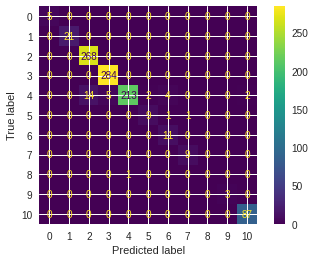

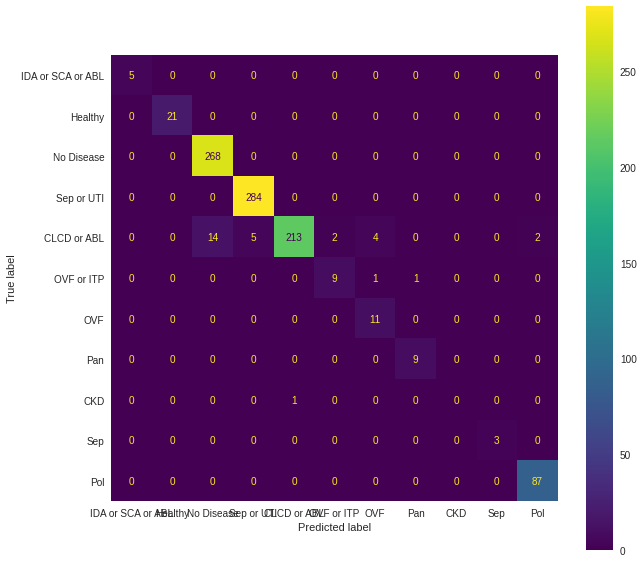

In [ ]:

# Predict the dependent variable of the test set.
y_train_pred = grid.predict(X_train)
y_pred = grid.predict(X_test)
print("performance on training dataset")
print(classification_report(y_train, y_train_pred, target_names = label))
print("==============================================")
print("performance on Testing dataset")
print(classification_report(y_test, y_pred, target_names = label))
cm = confusion_matrix(y_test, y_pred)
print("==============================================")
print(cm)
print("==============================================")
cm_display = ConfusionMatrixDisplay(cm).plot()

cmp = ConfusionMatrixDisplay(cm, display_labels=label)
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
cmp.plot(ax=ax)